## Testing image editing capabilities with GPT-image-1

### Set Environment

In [1]:
# Import required packages
import os
import sys
import base64
import requests
import json
from IPython.display import display, Image
from azure.identity import DefaultAzureCredential

In [ ]:
# Set environment variables
INPUT_IMAGE_PATH = "./input_image.jpeg"
OUTPUT_IMAGE_PATH = "./output_image_edited.jpeg"
AOAI_API_BASE = <ENTER_YOUR_AOAI_API_BASE_URL>
AOAI_DEPLOYMENT_NAME = <ENTER_YOUR_AOAI_DEPLOYMENT_NAME>
AOAI_API_VERSION = "2025-04-01-preview"

### Check Original Image

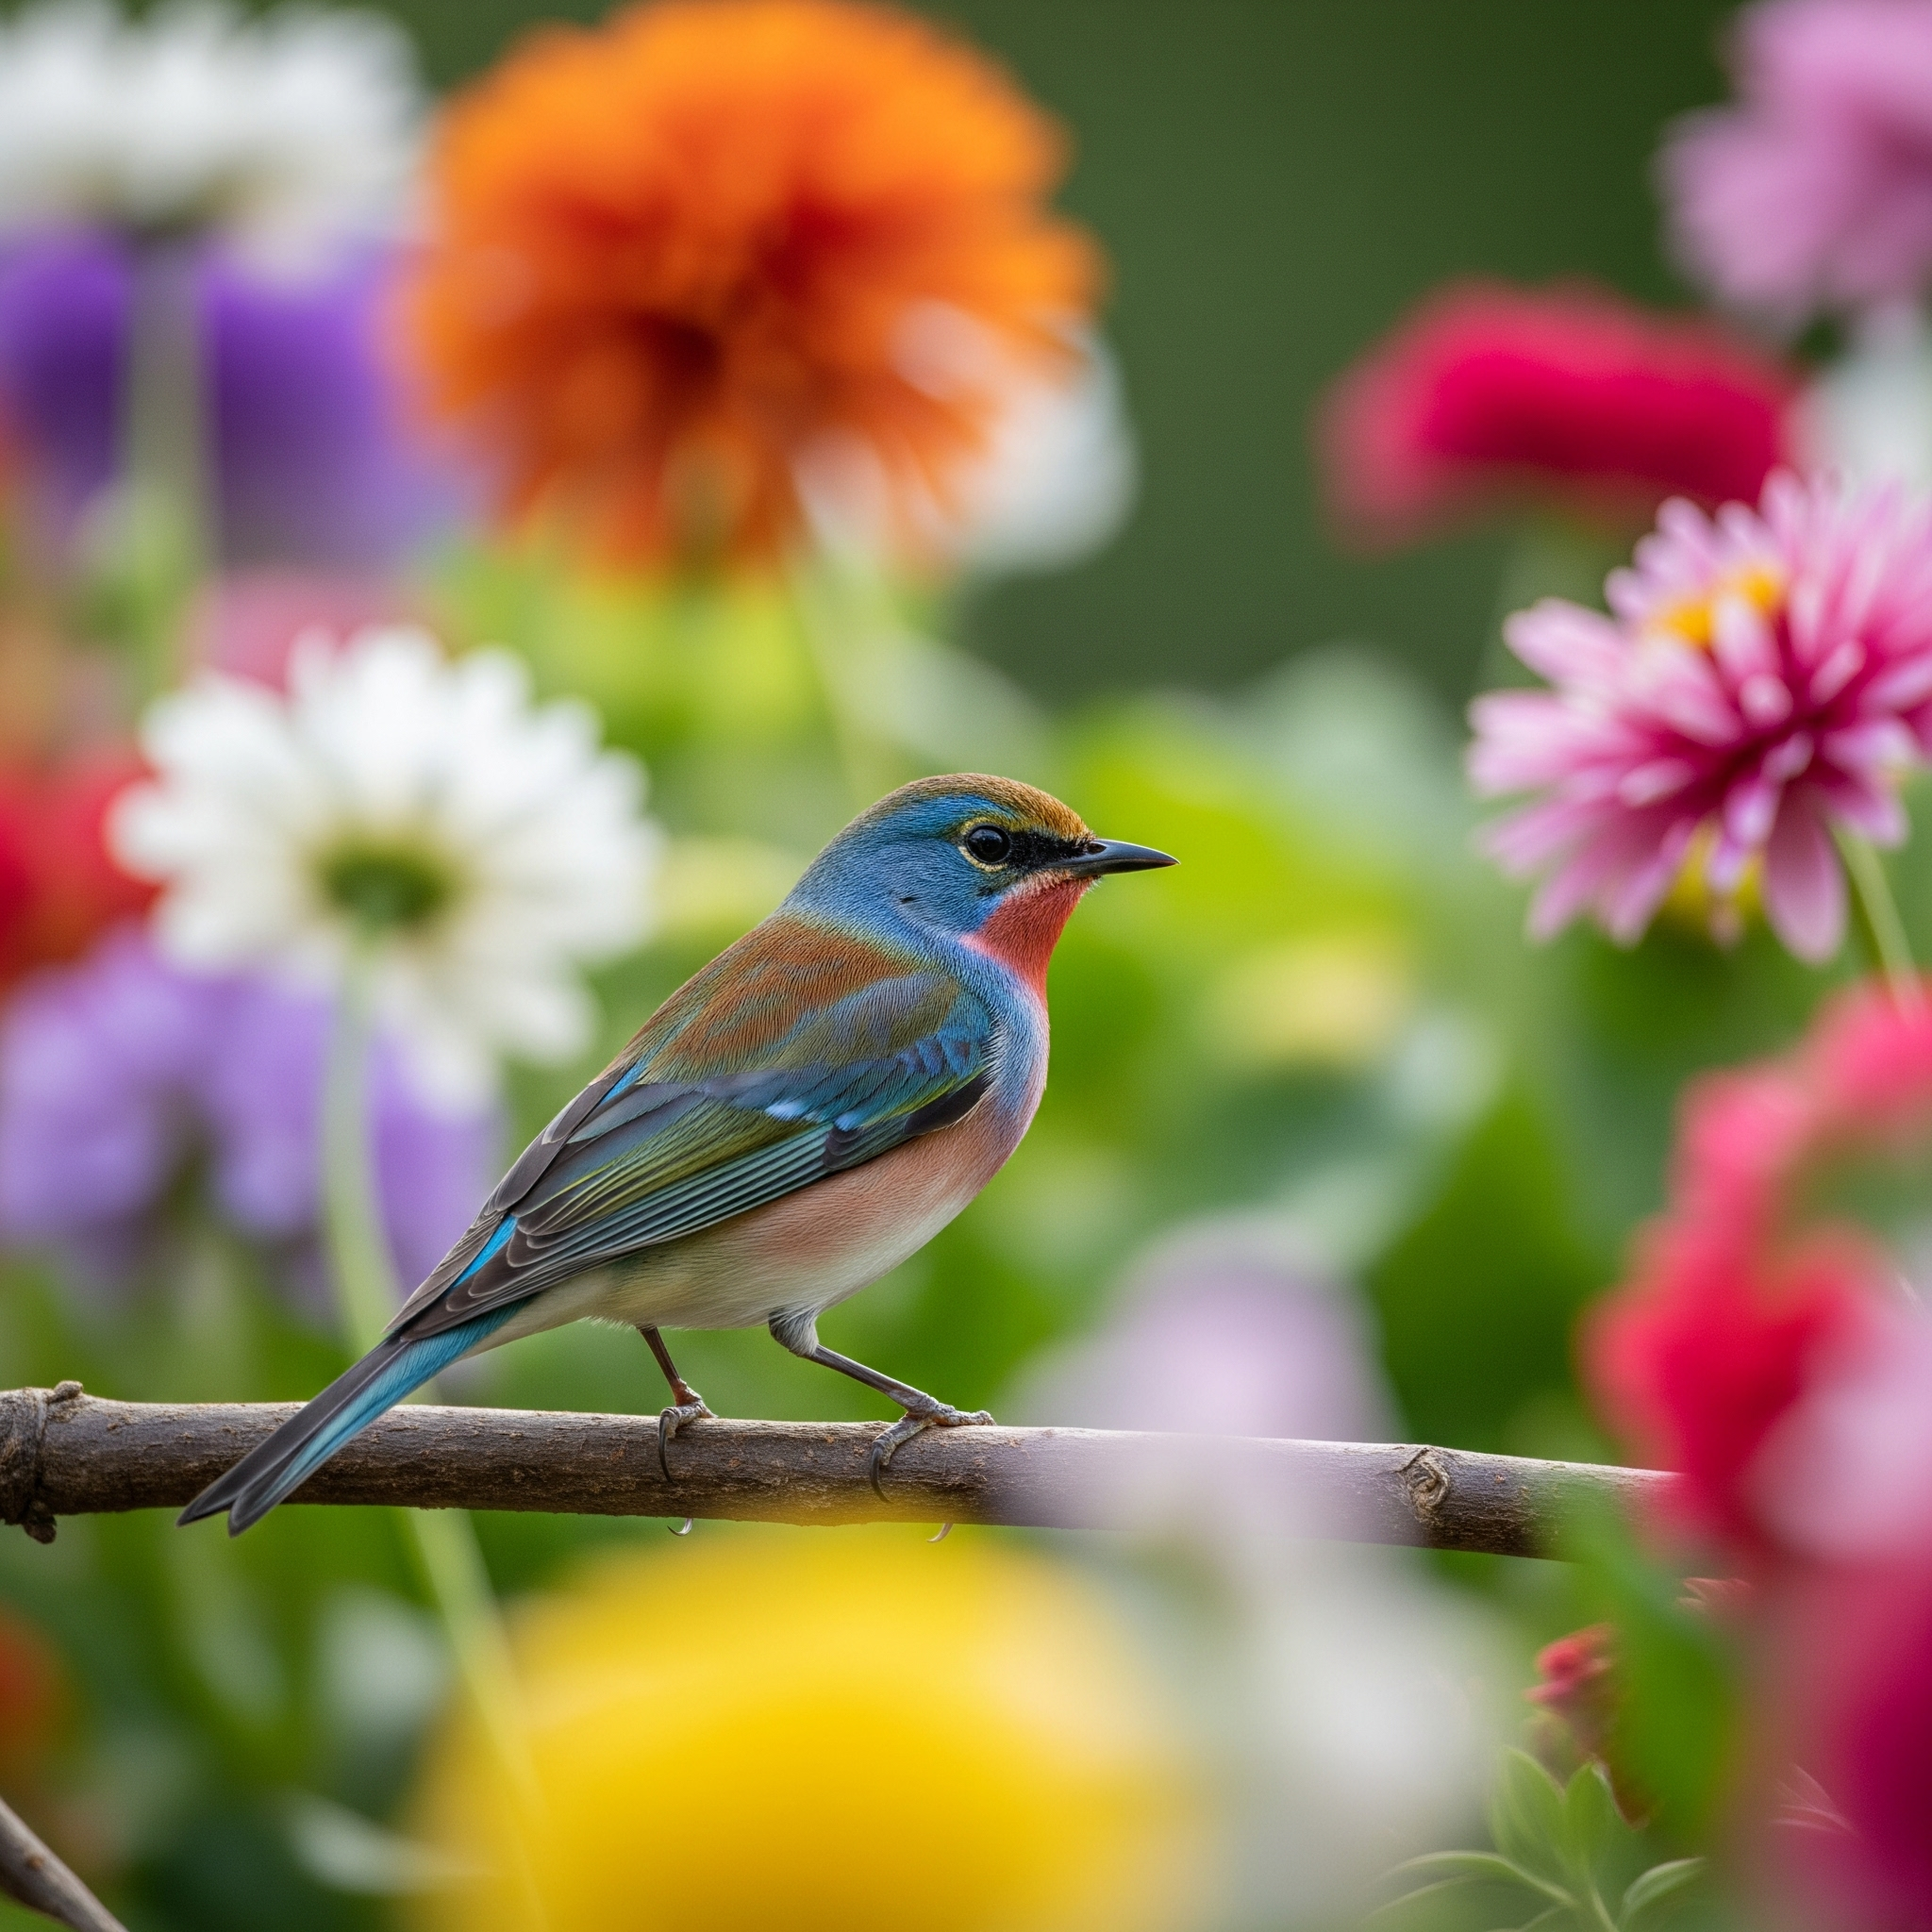

In [3]:
# show image in the notebook
def show_image(image_path):
    try:        
        display(Image(filename=image_path))
    except ImportError:
        print("IPython is not installed. Cannot display image in notebook.", file=sys.stderr)

show_image(INPUT_IMAGE_PATH)

### Generate Modified Image

In [4]:
# Construct API URL
API_URL = f"{AOAI_API_BASE}/openai/deployments/{AOAI_DEPLOYMENT_NAME}/images/edits?api-version={AOAI_API_VERSION}"

In [5]:
# Set user prompt
PROMPT = "Add a giant, friendly robot behind the bird."

Making API call to edit the image...
API call successful!
Edited image saved to: ./output_image_edited.jpeg

--- Edited Image ---


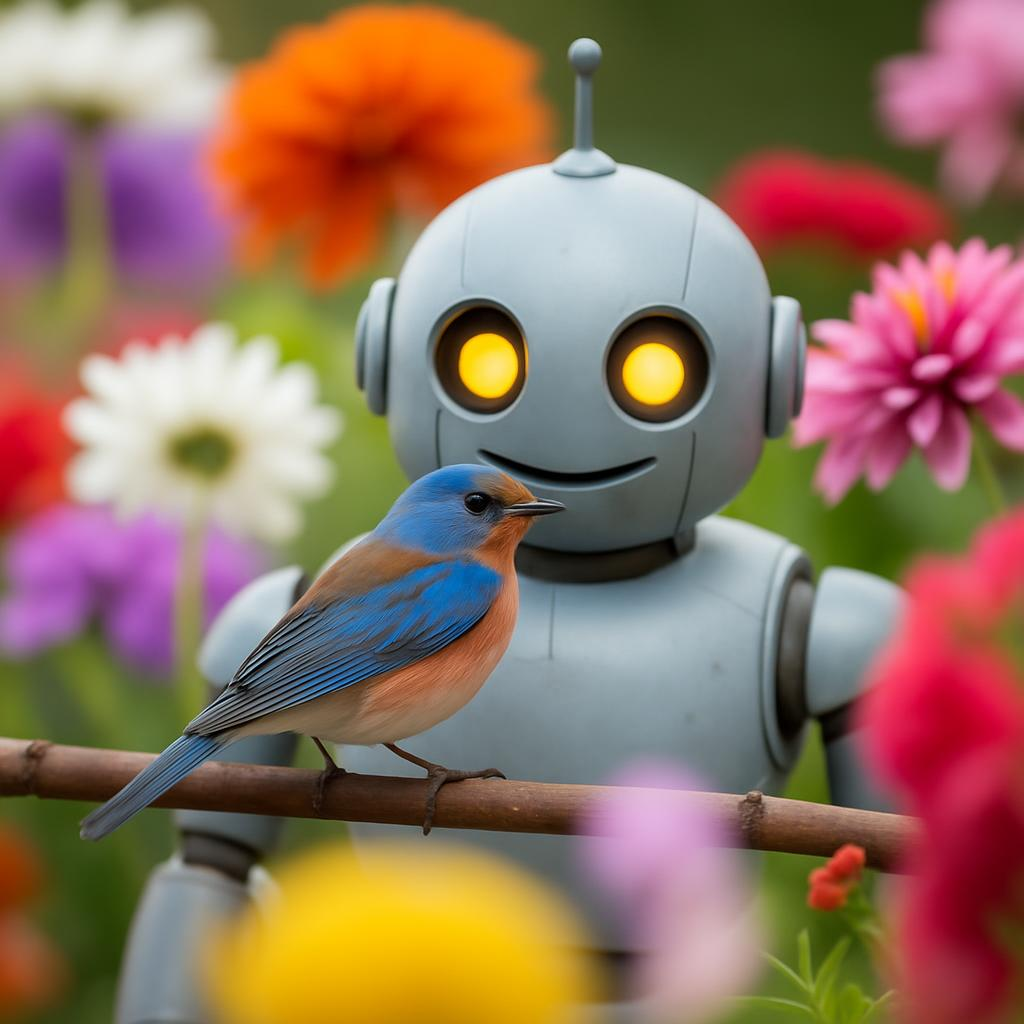

In [6]:
# Call Image API to edit the image
try:
    with open(INPUT_IMAGE_PATH, "rb") as image_file:
        # Input image
        files = {
            "image": (
                os.path.basename(INPUT_IMAGE_PATH),
                image_file,
                "image/jpeg")
        }

        # Input prompt
        data = {
            "prompt": PROMPT,
            "n": 1,
            "size": "1024x1024",
            "quality": "medium",
            "output_compression": 100,
            "output_format": "jpeg"
        }

        # Entra ID Auth
        credential = DefaultAzureCredential()
        token = credential.get_token("https://cognitiveservices.azure.com/.default")
        headers = {
            "Authorization": f"Bearer {token.token}"
        }

        # Image API request
        print("Making API call to edit the image...")
        response = requests.post(
            API_URL,
            headers = headers,
            files = files,
            data = data
        )

    if response.status_code == 200:
        print("API call successful!")
        response_data = response.json()

        generated_image_b64 = None
        if 'data' in response_data and isinstance(response_data['data'], list) and len(response_data['data']) > 0:
            generated_image_b64 = response_data['data'][0].get('b64_json')

        if generated_image_b64:
            decoded_image_data = base64.b64decode(generated_image_b64)
            with open(OUTPUT_IMAGE_PATH, "wb") as f:
                f.write(decoded_image_data)
            print(f"Edited image saved to: {OUTPUT_IMAGE_PATH}")

            print("\n--- Edited Image ---")
            show_image(OUTPUT_IMAGE_PATH)
        else:
            print("Something went wrong:\n", json.dumps(response_data, indent=2), file=sys.stderr)

    else:
        print(f"\nAPI call failed with status code: {response.status_code}", file=sys.stderr)

except Exception as e:
    print(f"An unexpected error occurred: {e}", file=sys.stderr)